In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns
sns.set(color_codes=True)

In [6]:
%pwd

'/home/jyuwei/code/WordEmbedding-SubCulture/src/semi_supervised'

In [9]:
from sample_seeds import read_warriner_ratings
csv_path = '../../data/epa/Ratings_Warriner_et_al.csv'
voc = read_warriner_ratings(csv_path)

In [19]:
def plot(voc, axis):
    x = np.array([voc[w][axis] for w in voc.keys()])
    sns.distplot(x)
    y = np.abs(x)
    sns.distplot(y)
    print(np.mean(y))

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.235189994118594


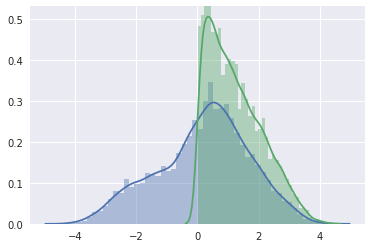

In [20]:
plot(voc, 'E')

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.1841950160708503


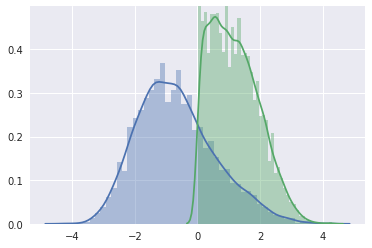

In [21]:
plot(voc, 'P')

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.158678155726863


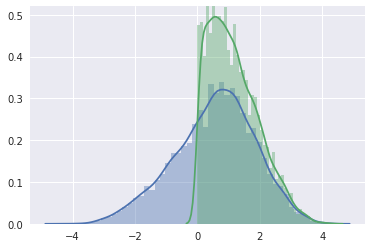

In [22]:
plot(voc, 'A')

In [ ]:
x = np.load('../../result/semi-supervised/matrix.npy')

In [11]:
import csv
with open('../../data/epa/Ratings_Warriner_et_al.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    V = []
    A = []
    D = []
    for row in reader:
        V.append(float(row['V.Mean.Sum']))
        A.append(float(row['A.Mean.Sum']))
        D.append(float(row['D.Mean.Sum']))

In [13]:
print(V)

[6.26, 5.3, 2.84, 2.63, 5.85, 5.43, 4.48, 2.42, 2.05, 5.52, 5.57, 7.0, 4.0, 5.15, 6.64, 3.53, 3.05, 5.28, 3.84, 4.05, 2.5, 3.1, 2.58, 5.11, 4.26, 4.62, 3.28, 2.79, 3.86, 4.1, 3.53, 5.43, 6.58, 4.58, 5.5, 4.4, 3.43, 5.25, 4.45, 4.06, 6.67, 7.55, 1.53, 2.05, 3.45, 3.9, 6.61, 5.32, 4.59, 6.1, 6.21, 6.19, 5.63, 6.48, 6.39, 6.59, 6.84, 6.68, 6.68, 5.35, 2.55, 3.46, 6.1, 6.35, 6.76, 5.47, 4.6, 7.45, 8.05, 6.38, 5.26, 5.39, 4.89, 5.7, 5.19, 4.42, 6.33, 6.32, 7.42, 3.21, 3.38, 2.68, 6.37, 4.11, 3.27, 7.75, 7.28, 3.15, 3.26, 6.43, 6.53, 2.18, 5.85, 7.1, 6.33, 5.58, 5.5, 5.0, 5.6, 6.19, 5.53, 5.25, 6.0, 5.52, 5.64, 6.0, 6.18, 5.7, 6.14, 6.47, 6.24, 6.21, 6.15, 5.42, 6.22, 5.4, 4.81, 5.1, 4.11, 5.55, 5.45, 5.84, 5.82, 6.23, 4.45, 2.86, 2.89, 3.52, 3.52, 6.15, 6.11, 6.14, 4.7, 5.17, 5.84, 5.77, 5.15, 5.95, 5.06, 5.5, 5.76, 4.25, 5.53, 4.37, 4.4, 4.45, 4.79, 5.32, 7.0, 4.8, 6.16, 7.58, 7.35, 7.25, 7.05, 5.16, 5.91, 5.56, 6.29, 4.82, 5.25, 6.0, 5.38, 6.9, 6.68, 5.67, 7.4, 6.47, 7.37, 7.38, 6.33, 6.6

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


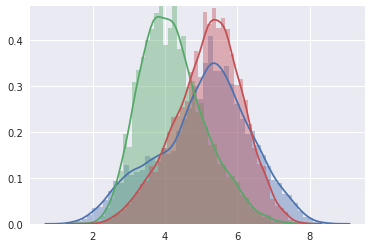

In [15]:
sns.distplot(V)
sns.distplot(A)
sns.distplot(D)